# 02. Analyzing Receipts with Azure Form Recognizer

In the artificial intelligence (AI) field of computer vision, optical character recognition (OCR) is commonly used to read printed or handwritten documents. Often, the text is simply extracted from the documents into a format that can be used for further processing or analysis.

A more advanced OCR scenario is the extraction of information from forms, such as purchase orders or invoices, with a semantic understanding of what the fields in the form represent. The **Form Recognizer** service is specifically designed for this kind of AI problem.

## View a receipt

In this example, you'll use the Form Recognizer's built-in model for analyzing receipts.

Click the **Run cell** (&#9655;) button (to the left of the cell) below to run it and see an example of a receipt that you'll use Form Recognizer to analyze.

<img src="https://docs.microsoft.com/en-us/azure/cognitive-services/form-recognizer/media/tables-example.jpg#lightbox">

> https://docs.microsoft.com/en-us/azure/cognitive-services/form-recognizer/

In [1]:
#!pip install azure-ai-formrecognizer --pre

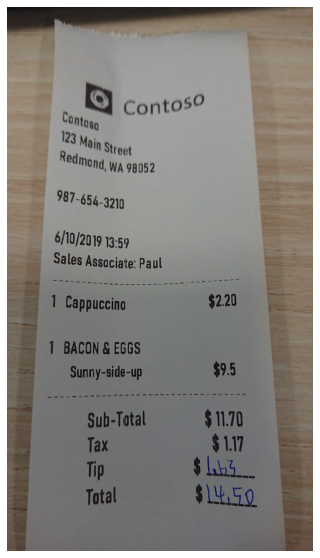

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline


# Load and display a receipt image
fig = plt.figure(figsize=(30, 10))
image_path = os.path.join('receipt.jpg')
img = Image.open(image_path)
plt.axis('off')
plt.imshow(img)

In [3]:
form_endpoint = "tobereplaced"
form_key = "tobereplaced"

print('Ready to use form recognizer at {} using key {}'.format(form_endpoint, form_key))

Ready to use form recognizer at https://formsrecognizerserger.cognitiveservices.azure.com/ using key 0d7f5712a16b462e8f6aefbde5cb8039


## Analyze a receipt

Now you're ready to use Form Recognizer to analyze a receipt.

In [4]:
import os
from azure.ai.formrecognizer import FormRecognizerClient
from azure.core.credentials import AzureKeyCredential

# Create a client for the form recognizer service
form_recognizer_client = FormRecognizerClient(endpoint=form_endpoint, credential=AzureKeyCredential(form_key))

try:
    print("Analyzing receipt...\n")
    # Get the receipt image file
    image_path = os.path.join('receipt.jpg')

    # Submit the file data to form recognizer
    with open(image_path, "rb") as f:
        analyze_receipt = form_recognizer_client.begin_recognize_receipts(receipt=f)
    
    # Get the results
    receipt_data = analyze_receipt.result()

    # Print the extracted data for the first (and only) receipt
    receipt = receipt_data[0]
    receipt_type = receipt.fields.get("ReceiptType")
    if receipt_type:
        print("Receipt Type: {}".format(receipt_type.value))
    merchant_address = receipt.fields.get("MerchantAddress")
    if merchant_address:
        print("Merchant Address: {}".format(merchant_address.value))
    merchant_phone = receipt.fields.get("MerchantPhoneNumber")
    if merchant_phone:
        print("Merchant Phone: {}".format(merchant_phone.value))
    transaction_date = receipt.fields.get("TransactionDate")
    if transaction_date:
        print("Transaction Date: {}".format(transaction_date.value))
    print("Receipt items:")
    items = receipt.fields.get("Items")
    if items:
        for idx, item in enumerate(receipt.fields.get("Items").value):
            print("\tItem #{}".format(idx+1))
            item_name = item.value.get("Name")
            if item_name:
                print("\t - Name: {}".format(item_name.value))
            item_total_price = item.value.get("TotalPrice")
            if item_total_price:
                print("\t - Price= {}".format(item_total_price.value))
    subtotal = receipt.fields.get("Subtotal")
    if subtotal:
        print("Subtotal= {} ".format(subtotal.value))
    tax = receipt.fields.get("Tax")
    if tax:
        print("Tax= {}".format(tax.value))
    total = receipt.fields.get("Total")
    if total:
        print("Total= {}".format(total.value))

except Exception as ex:
    print('Error:', ex)

Analyzing receipt...

Receipt Type: Itemized
Merchant Address: 123 Main Street Redmond, WA 98052
Merchant Phone: +19876543210
Transaction Date: 2019-06-10
Receipt items:
	Item #1
	 - Name: Cappuccino
	 - Price= 2.2
	Item #2
	 - Name: BACON & EGGS
	 - Price= 9.5
Subtotal= 11.7 
Tax= 1.17
Total= 14.5
